# Fictional DB - Real Estate - Apartments for Rent in Rio de Janeiro

### Clearing NaN values from the database

In [1]:
import pandas as pd

dados = pd.read_csv('dados/aluguel.csv', sep =';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [2]:
df1 = pd.DataFrame(dados)
df1 = df1.fillna(0)
df1.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


### Exporting the now clean DB

In [3]:
df1.to_csv('dados/aluguel_limpo.csv', sep = ';' , index=False)

### Working with the clean DB

In [4]:
import pandas as pd
dados = pd.read_csv('dados/aluguel_limpo.csv' , sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


### Classifying properties in Clusters: How many do we have for each type in our DB (Residential, Commercial or Lands)?

In [5]:
list(dados['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [6]:
import numpy as np

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [7]:
dados['Classificacao'] = dados['Tipo']

In [8]:
dados['Classificacao'].replace({'Quitinete':'Residencial', 'Apartamento':'Residencial','Casa':'Residencial','Casa de Condomínio':'Residencial','Flat':'Residencial','Casa de Vila':'Residencial', 'Loft':'Residencial','Chácara':'Residencial','Sítio':'Residencial','Studio':'Residencial'}, inplace=True)

In [9]:
dados['Classificacao'].replace({'Conjunto Comercial/Sala':'Comercial','Prédio Inteiro':'Comercial','Loja/Salão':'Comercial','Galpão/Depósito/Armazém':'Comercial','Casa Comercial':'Comercial','Box/Garagem':'Comercial','Loja Shopping/ Ct Comercial':'Comercial','Pousada/Chalé':'Comercial','Hotel':'Comercial','Indústria':'Comercial','Terreno Padrão':'Terreno','Loteamento/Condomínio':'Terreno'}, inplace=True)

In [10]:
dados['Classificacao'].replace({'Industrial':'Comercial'},inplace=True)

In [11]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,Comercial
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,Comercial


### What is the total volume of each available category?

In [13]:
dados['Classificacao'].value_counts().to_frame()

,Classificacao
Residencial,23122
Comercial,9763
Terreno,75


### Finding the total Rent value (Rent + Condo Fee) and the Gross m² price - For the whole DB

In [14]:
dados['Valor Total de Aluguel'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [15]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,Comercial,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial,22000.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial,1000.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,Comercial,57223.0


In [16]:
dados['Preço m² Bruto'] = round((dados['Valor Total de Aluguel'] / dados['Area']),2)

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,Comercial,10331.0,68.87
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial,22000.0,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial,1000.0,15.38
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,Comercial,57223.0,82.34


### Finding the Net m² price (only considering Rent, not condo fee) - For the whole DB

In [18]:
dados['Preço m² Líquido'] = round((dados['Valor'] / dados['Area']),2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial,7000.0,70.00,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,Comercial,10331.0,68.87,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46,16.67
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14,17.14
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36,26.00
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial,22000.0,29.33,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial,1000.0,15.38,15.38
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,Comercial,57223.0,82.34,50.36


### Condo fee per m² (absolute value and diff percentage(%) of rent)

In [21]:
dados['Complementos ao aluguel'] = dados['Preço m² Bruto'] - dados['Preço m² Líquido']
dados['% Complemento ao Aluguel'] = round((dados['Complementos ao aluguel'] / dados['Preço m² Líquido']),2)

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50,42.50,14.00,0.33
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial,7000.0,70.00,70.00,0.00,0.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,Comercial,10331.0,68.87,34.67,34.20,0.99
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67,53.33,27.34,0.51
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46,16.67,4.79,0.29
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14,17.14,0.00,0.00
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36,26.00,6.36,0.24
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial,22000.0,29.33,29.33,0.00,0.00
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial,1000.0,15.38,15.38,0.00,0.00
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,Comercial,57223.0,82.34,50.36,31.98,0.64


### Exporting the new DB with values analysis

In [22]:
dados.to_csv('dados/aluguel_final.csv', sep = ';' , index=False)

### In this new DB there are not only appartments, but houses, lands, commercial places and industrial places.
### Let's now analyze only RESIDENTIAL APPARTMENTS for rent in our DB at Rio de Janeiro and find out:

##### ---- 1) How many residential appartmanets I have in my database and what is the Mean value of them?
##### ---- 2) Top 10 most valuable Neighbourhoods
##### ---- 3) What is the mean price for each one?
#####  ---- 4) What is the median size of the available appartments at these top 10 neighbourhoods?
#####  ---- 5) What is the most frequent typology (number of rooms) in each neighborhood?
#####  ---- 6) How many car spaces are more frequent in each neighborhood?

In [24]:
##### First of all, I will clean again my db with the Clusters that I've created before

#### Translation: Residencial = Residential ; Comercial = Commercial ; Terreno = Lands

list(dados['Classificacao'].drop_duplicates())

['Residencial', 'Comercial', 'Terreno']

In [25]:
residencial = ['Residencial']
comercial = ['Comercial']
terreno = ['Terreno']

In [26]:
dados['Classificacao'].isin(residencial).head(10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Classificacao, dtype: bool

In [27]:
selecao_residencial = dados['Classificacao'].isin(residencial)
selecao_residencial

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Classificacao, Length: 32960, dtype: bool

In [28]:
dados_residencial = dados[selecao_residencial]
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50,42.50,14.00,0.33
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,Residencial,7000.0,70.00,70.00,0.00,0.00
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67,53.33,27.34,0.51
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46,16.67,4.79,0.29
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14,17.14,0.00,0.00
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36,26.00,6.36,0.24
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,Residencial,22000.0,29.33,29.33,0.00,0.00
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,Residencial,1000.0,15.38,15.38,0.00,0.00
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,Residencial,1200.0,33.33,33.33,0.00,0.00
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Residencial,2216.0,31.66,21.43,10.23,0.48


In [31]:
## Ok. Only residential properties. But still there are Houses, Ranchs and Farms. 
## Now I will work only with APPARTMENTS and STUDIOS

## Note¹: "Quitinete" (PT-BR) is only another way to reffer to Studios used in Brazil.


list(dados_residencial['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila',
 'Loft',
 'Chácara',
 'Sítio',
 'Studio']

In [32]:
residencial_2 = ['Quitinete','Apartamento','Studio']

In [33]:
residencial_2

['Quitinete', 'Apartamento', 'Studio']

In [35]:
dados_residencial['Tipo'].isin(residencial_2).head(10)

0      True
1     False
3      True
4      True
5      True
6      True
7     False
8     False
10     True
11     True
Name: Tipo, dtype: bool

In [37]:
selecao_residencial_2 = dados_residencial['Tipo'].isin(residencial_2)
selecao_residencial_2

0         True
1        False
3         True
4         True
5         True
         ...  
32953     True
32955     True
32956     True
32957     True
32958     True
Name: Tipo, Length: 23122, dtype: bool

In [39]:
dados_aptos_residencial = dados_residencial[selecao_residencial_2]
dados_aptos_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50,42.50,14.00,0.33
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67,53.33,27.34,0.51
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46,16.67,4.79,0.29
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14,17.14,0.00,0.00
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36,26.00,6.36,0.24
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,Residencial,1200.0,33.33,33.33,0.00,0.00
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,Residencial,2216.0,31.66,21.43,10.23,0.48
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Residencial,1969.0,21.88,16.67,5.21,0.31
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,Residencial,2611.0,65.28,50.00,15.28,0.31
14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,Residencial,2301.0,85.22,66.67,18.55,0.28


### I will now export this new DB to continue the analysis

In [40]:
dados_aptos_residencial.to_csv('dados/aluguel_final_aptos_residencial.csv', sep = ';', index=False)

In [42]:
dados_residenciais = pd.read_csv('dados/aluguel_final_aptos_residencial.csv', sep =';')
dados_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,Residencial,2260.0,56.50,42.50,14.00,0.33
1,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,Residencial,1210.0,80.67,53.33,27.34,0.51
2,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,Residencial,1030.0,21.46,16.67,4.79,0.29
3,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,Residencial,1200.0,17.14,17.14,0.00,0.00
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,Residencial,1618.0,32.36,26.00,6.36,0.24


In [47]:
len(dados_residenciais)

20372

In [49]:
dados_residenciais['Valor Total de Aluguel'].mean().round(2)

6679.47

# ---- 1) How many residential appartmanets I have in my database and what is the Mean value of them?

###### So we have in total 20.372 residential appartments available for Rent in our DB. And we have a mean price of 6.679 BRL.

###### That means that our residential apartments DB have a mean value of 136 M BRL ! (136.064.588). 
###### That's a mean value of how much profit we can have.

###### ------------------ Let's now check the 2nd point ------------------ 

# ---- 2) Top 10 most valuable Neighbourhoods
# ---- 3) What is the mean price for each one?

In [58]:
grupo_bairro_residencial = dados_residenciais.groupby('Bairro')

grupo_bairro_R = grupo_bairro_residencial[['Valor Total de Aluguel']].mean().sort_values(by=['Valor Total de Aluguel'], ascending=False).head(10)

Text(0.5, 1.0, 'TOP 10 Most Valuable Neighbourhoods - Total Mean Rent Price')

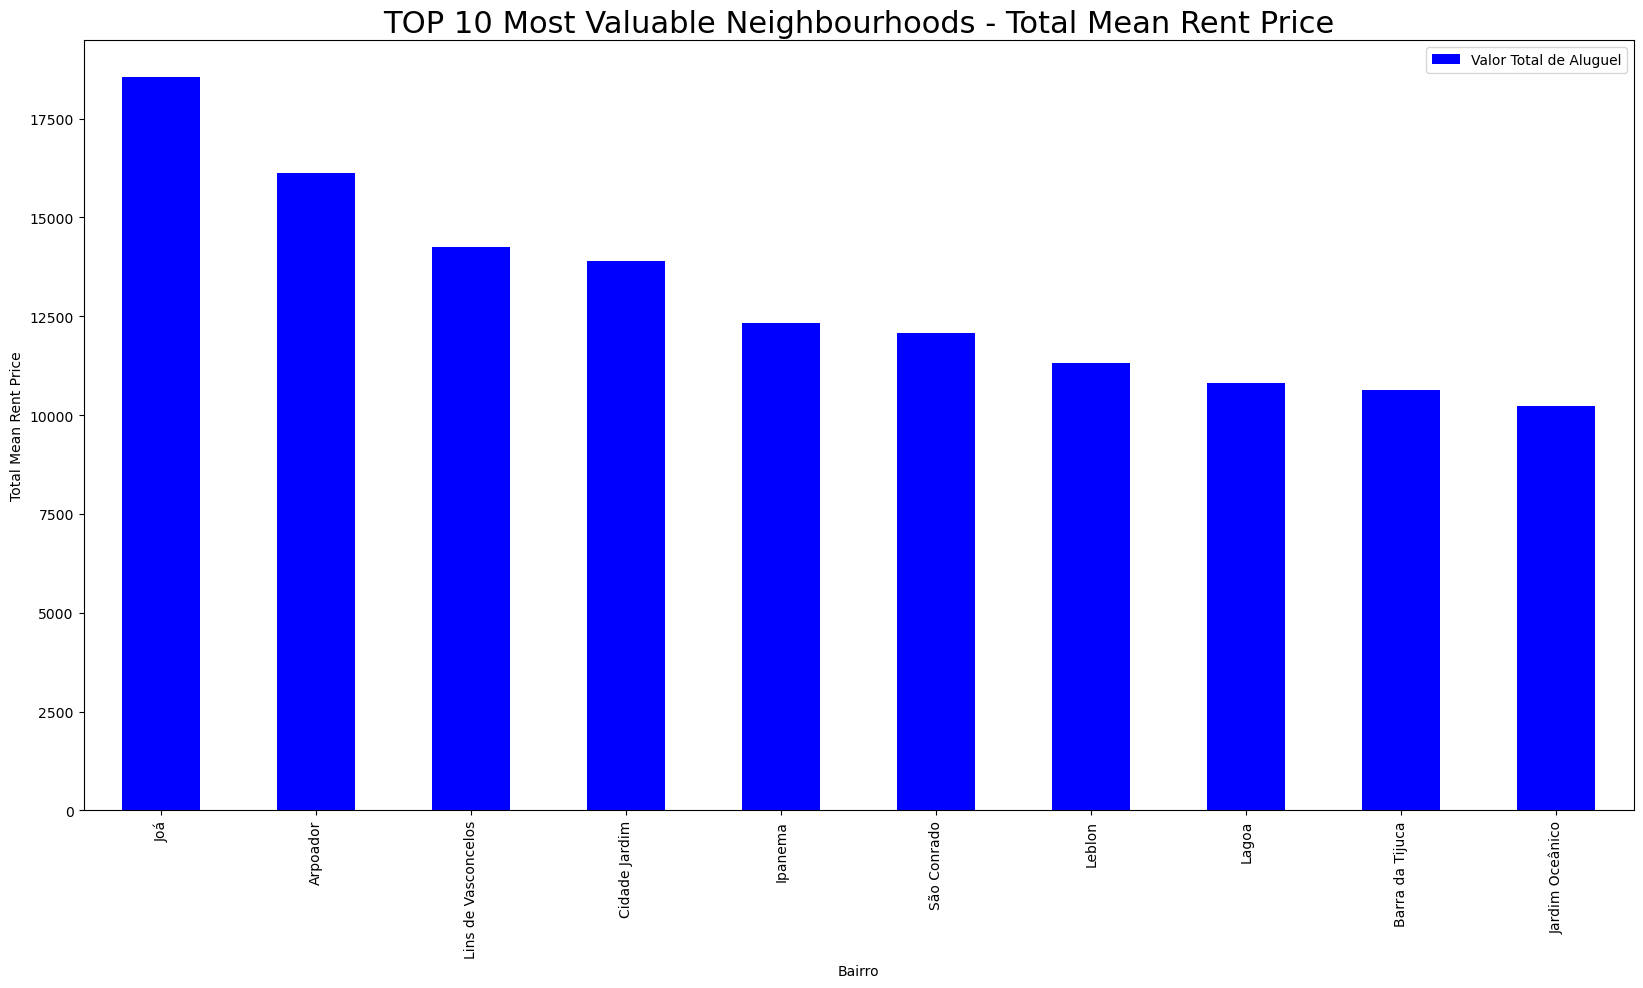

In [59]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

fig = grupo_bairro_R.plot.bar(color = 'blue')
fig.set_ylabel('Total Mean Rent Price')
fig.set_title('TOP 10 Most Valuable Neighbourhoods - Total Mean Rent Price', {'fontsize': 22})


#  ---- 4) What is the median size of the available appartments at these top 10 neighbourhoods?

In [60]:
list(dados_residenciais['Bairro'].drop_duplicates())

['Copacabana',
 'Centro',
 'Higienópolis',
 'Vista Alegre',
 'Cachambi',
 'Grajaú',
 'Lins de Vasconcelos',
 'Freguesia (Jacarepaguá)',
 'Barra da Tijuca',
 'Tijuca',
 'Olaria',
 'Ipanema',
 'Botafogo',
 'Recreio dos Bandeirantes',
 'Leblon',
 'Jardim Oceânico',
 'Humaitá',
 'Península',
 'Méier',
 'Vargem Pequena',
 'Maracanã',
 'Jacarepaguá',
 'Jardim Botânico',
 'Vila Valqueire',
 'Gávea',
 'Cosme Velho',
 'Bonsucesso',
 'Todos os Santos',
 'Laranjeiras',
 'Itanhangá',
 'Flamengo',
 'Praça Seca',
 'Lagoa',
 'Catete',
 'Jardim Carioca',
 'Glória',
 'Vila Isabel',
 'Rocha Miranda',
 'Taquara',
 'Engenho Novo',
 'Campo Grande',
 'Engenho de Dentro',
 'São Conrado',
 'Cidade Nova',
 'Pilares',
 'Tomás Coelho',
 'Água Santa',
 'São Cristóvão',
 'Ilha do Governador',
 'Vila da Penha',
 'Anil',
 'Vaz Lobo',
 'Madureira',
 'São Francisco Xavier',
 'Pechincha',
 'Leme',
 'Irajá',
 'Urca',
 'Penha',
 'Gardênia Azul',
 'Rio Comprido',
 'Andaraí',
 'Quintino Bocaiúva',
 'Inhaúma',
 'Marechal He

In [62]:
Top_10 = ['Joá','Arpoador','Cidade Jardim','São Conrado','Lins de Vasconcelos','Ipanema','Barra da Tijuca','Leblon',
          'Itanhangá','Lagoa']

Top_10

['Joá',
 'Arpoador',
 'Cidade Jardim',
 'São Conrado',
 'Lins de Vasconcelos',
 'Ipanema',
 'Barra da Tijuca',
 'Leblon',
 'Itanhangá',
 'Lagoa']

In [63]:
dados_residenciais['Bairro'].isin(Top_10).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: Bairro, dtype: bool

In [64]:
selecao_top_10 = dados_residenciais['Bairro'].isin(Top_10)
selecao_top_10

0        False
1        False
2        False
3        False
4        False
         ...  
20367    False
20368    False
20369    False
20370    False
20371     True
Name: Bairro, Length: 20372, dtype: bool

In [65]:
dados_top_10 = dados_residenciais[selecao_top_10]

In [66]:
dados_top_10.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
7,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Residencial,1969.0,21.88,16.67,5.21,0.31
12,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,Residencial,2436.0,36.36,25.37,10.99,0.43
16,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,Residencial,9563.0,76.50,56.00,20.50,0.37
18,Apartamento,Barra da Tijuca,3,3,1,175,4200.0,1500.0,500.0,Residencial,6200.0,35.43,24.00,11.43,0.48
23,Apartamento,Leblon,3,1,0,110,3900.0,1500.0,120.0,Residencial,5520.0,50.18,35.45,14.73,0.42
26,Apartamento,Barra da Tijuca,3,1,2,70,1800.0,1095.0,140.0,Residencial,3035.0,43.36,25.71,17.65,0.69
28,Apartamento,Barra da Tijuca,3,2,1,110,4500.0,2000.0,450.0,Residencial,6950.0,63.18,40.91,22.27,0.54
31,Apartamento,Barra da Tijuca,3,1,1,72,2350.0,600.0,70.0,Residencial,3020.0,41.94,32.64,9.30,0.28
35,Apartamento,Ipanema,1,0,0,35,2000.0,650.0,75.0,Residencial,2725.0,77.86,57.14,20.72,0.36
36,Apartamento,Ipanema,1,0,0,38,1400.0,530.0,77.0,Residencial,2007.0,52.82,36.84,15.98,0.43


In [67]:
dados_top_10.to_csv('dados/aluguel_final_aptos_residencial2.csv', sep = ';', index=False)

In [68]:
dados_top_10 = pd.read_csv('dados/aluguel_final_aptos_residencial2.csv', sep =';')

dados_top_10

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Classificacao,Valor Total de Aluguel,Preço m² Bruto,Preço m² Líquido,Complementos ao aluguel,% Complemento ao Aluguel
0,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,Residencial,1969.0,21.88,16.67,5.21,0.31
1,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,Residencial,2436.0,36.36,25.37,10.99,0.43
2,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,Residencial,9563.0,76.50,56.00,20.50,0.37
3,Apartamento,Barra da Tijuca,3,3,1,175,4200.0,1500.0,500.0,Residencial,6200.0,35.43,24.00,11.43,0.48
4,Apartamento,Leblon,3,1,0,110,3900.0,1500.0,120.0,Residencial,5520.0,50.18,35.45,14.73,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0,Residencial,3364.0,34.33,23.47,10.86,0.46
7193,Apartamento,Barra da Tijuca,3,2,2,140,5500.0,1900.0,700.0,Residencial,8100.0,57.86,39.29,18.57,0.47
7194,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,Residencial,4259.0,53.24,37.50,15.74,0.42
7195,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,Residencial,17000.0,113.33,100.00,13.33,0.13


In [69]:
grupo_bairro_residencial2 = dados_top_10.groupby('Bairro')
grupo_bairro_R2 = grupo_bairro_residencial2[['Area']].median().sort_values(by=['Area'], ascending=False).head(10)

Text(0.5, 1.0, 'TOP 10 Most Valuable Neighbourhoods - Median Appartment Size in M²')

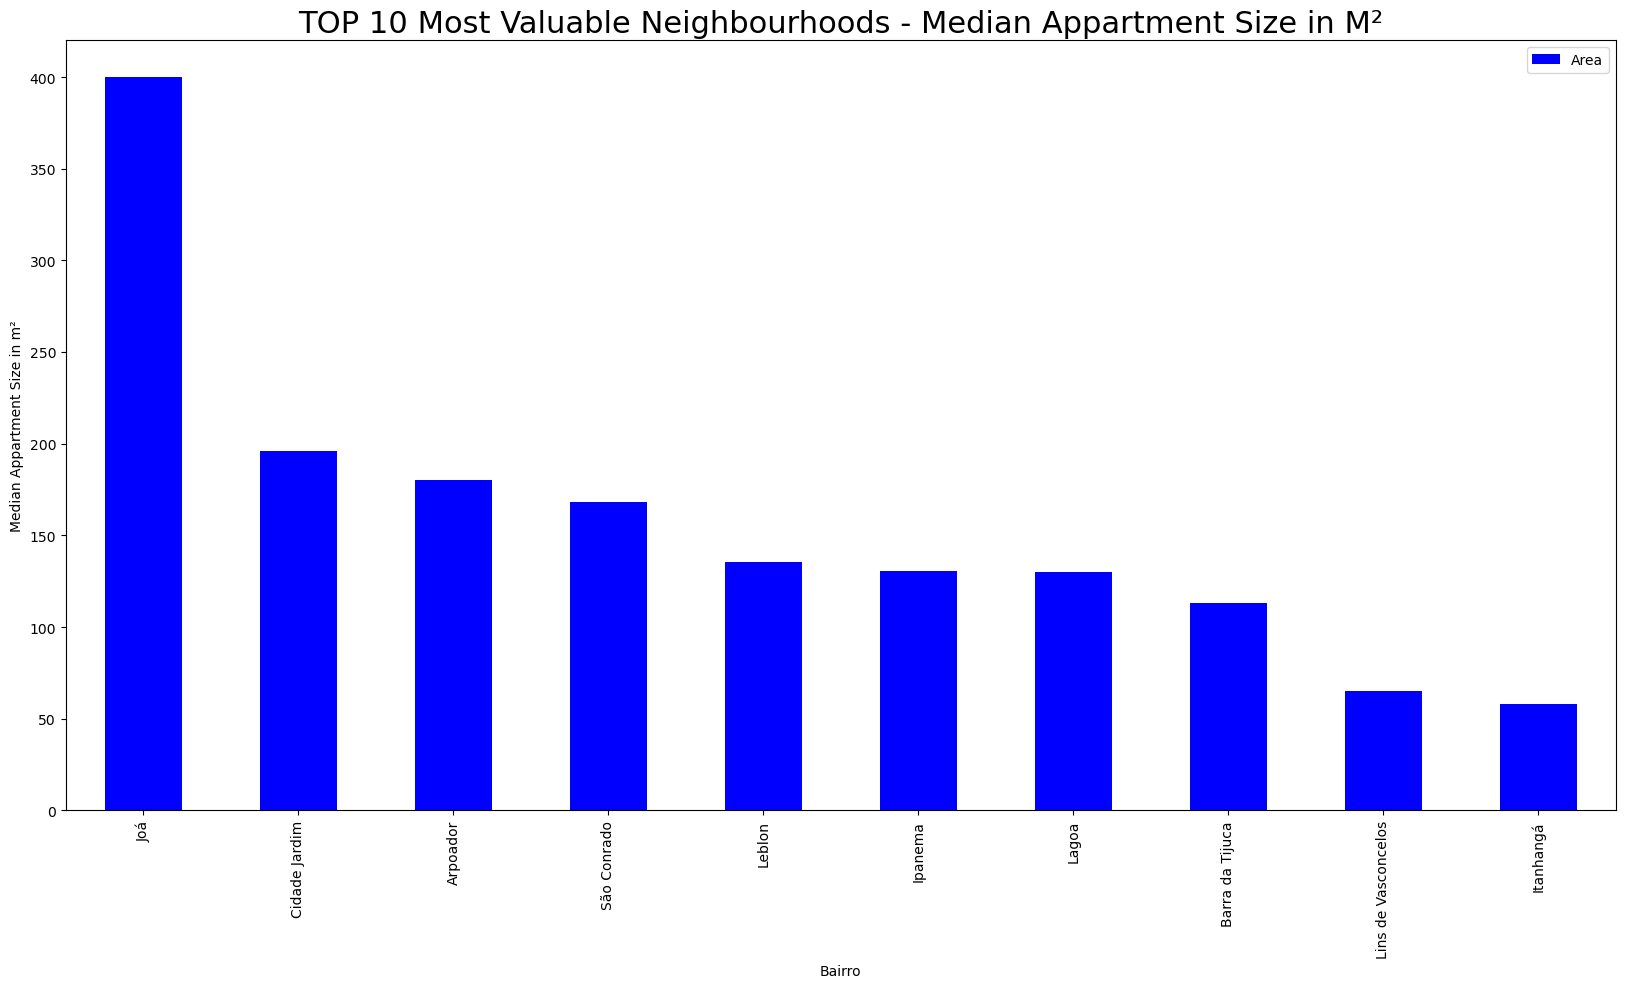

In [71]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

fig = grupo_bairro_R2.plot.bar(color = 'blue')
fig.set_ylabel('Median Appartment Size in m²')
fig.set_title('TOP 10 Most Valuable Neighbourhoods - Median Appartment Size in M²', {'fontsize': 22})


In [73]:
## By this we can see that there are only noble regions of Rio.
## And also we can see that in those regions the median size of an appartment (at least in our DB) is 125 m²
## We can assure that in those regions there are more demand for big appartments
### with the exception of compact apartments (Studios) which are valuable for being in prime areas (Eg: Lins de Vasconcelos and Itanhanga)

#  ---- 4) What is the most frequent typology (number of rooms) in each neighborhood?

In [76]:
dados_top_10.groupby('Bairro')['Quartos'].agg(pd.Series.mode).to_frame()

,Quartos
Bairro,
Arpoador,2
Barra da Tijuca,2
Cidade Jardim,3
Ipanema,3
Itanhangá,2
Joá,3
Lagoa,3
Leblon,3
Lins de Vasconcelos,2


#  ---- 6) How many car spaces are more frequent in each neighborhood?

In [77]:
dados_top_10.groupby('Bairro')['Vagas'].agg(pd.Series.mode).to_frame()

,Vagas
Bairro,
Arpoador,1
Barra da Tijuca,1
Cidade Jardim,2
Ipanema,1
Itanhangá,1
Joá,2
Lagoa,1
Leblon,1
Lins de Vasconcelos,1
